# Simulation of infection spreads in small network

This demo will run a simulation in how an infection can spread in a small network.

Initial idea: model the people as a 2d matrix. This limits the direct neighbors to 8, but we will change this assumption later on. Also, populate the matrix randomly.


Couple of assumptions:
1. Once a node is infected, it is cured after 14 days, unless it dies.
2. Once a node is cured after being infected, it has immunity to infection till 90 days.
3. New nodes can be added to the network randomly, with probability 0.01.
4. Once infected, a node has 0.03 probability of death. To simplify things, I will assume death happens in 14 days as well.
5. Nodes don't move
6. Every turn of the simulation marks one turn

In [1]:
import numpy as np
import matplotlib.pyplot as plot
from networkx.generators.random_graphs import erdos_renyi_graph
import networkx as nx
from enum import Enum


I use `ipycytoscape` as my visualization library, which will allow me to interact with graphs directly

In [2]:
from ipycytoscape import *

In [3]:
from typing import Callable, Iterator, Union, Optional, List

I keep a `Status` enum to denote node health

In [ ]:
class Status(Enum):
    HEALTHY = 1
    IMMUNE = 2
    INFECTED = 3


For my `Node` class, I keep a simple structure. I keep track of the current "health" of the node, and keep two counters to keep track of infection and immunity time. 

In [5]:
class Node:
    MAX_IMMUNITY_TIME = 90
    MAX_INFECTED_TIME = 14
    def __init__(self, status: Status = Status.HEALTHY):
        self.status = status
        self.infectionTime = 0
        self.immunityTime = 0
        
    def processCycle(time: int, infect: bool):
        if infect:
            if self.status == HEALTHY:
                self.infect(time)
        else:
            if self.status == Status.IMMUNE:
                if time - self.immunityTime > MAX_IMMUNITY_TIME:
                    self.disinfect()
            elif self.status == Status.INFECTED:
                if time - self.infectionTime > MAX_INFECTED_TIME:
                    self.immune()
    
    def immune(self, time: int):
        self.status = Status.IMMUNE
        self.immunityTime = time
        self.infectionTime = 0

    
    def disinfect(self):
        self.status = Status.HEALTHY
        self.infectionTime = 0
        self.immunityTime = 0

        
    def infect(self, infected_time: int):
        self.infectionTime = infected_time
        self.status = Status.INFECTED
        self.immunityTime = 0

NameError: name 'Status' is not defined

Finally, I create my network. Healthy nodes are indicated in blue, while infected are in red, and immune are in green.

In [ ]:
x = Network()


In [ ]:
import time
for i in range(10):
    time.sleep(1)
    x.drawGraph()

In [145]:
x.initializeInfected()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


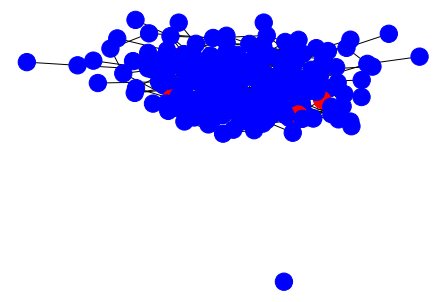

In [146]:
x.drawGraph()